- EDA
- Correlation
    - pearson
    - spearman

![EDA Process](../assets/XGBoost/EDA%20Process.png)

In [1]:
import sys
sys.path.append('../assets/XGBoost')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from kaggle_codes import kaggle_zip_path,kaggle_member_name,read_zip,topn,tweak_kag,TweakKagTransformer,get_rawX_y,kag_pl,model_selection

In [3]:
raw = read_zip(zip_filename=kaggle_zip_path,member_name=kaggle_member_name)
kag_X , kag_y = get_rawX_y(df=raw,y_col='Q6')
kag_X_train, kag_X_test, kag_y_train, kag_y_test = model_selection.train_test_split( kag_X, kag_y, test_size=.3, random_state=42, stratify=kag_y)
X_train = kag_pl.fit_transform(kag_X_train, kag_y_train)
X_test  = kag_pl.transform(kag_X_test)

m:\BASICS\ML Revisit\XGBoost\../assets/XGBoost\kaggle_codes.py:11: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open(member_name))


In [4]:
X_train.assign(data_scientist = kag_y_train=='Data Scientist').corr(method='spearman').style.background_gradient(cmap='RdBu',vmax=1,vmin=-1).set_sticky(axis='index')

,age,education,years_exp,compensation,python,r,sql,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_stat,data_scientist
age,1.000000,0.345717,0.644863,0.451349,0.046651,0.127667,0.134325,0.371123,-0.363626,-0.023384,-0.223529,0.201910,0.006262,0.073864,0.075440
education,0.345717,1.000000,0.098849,0.241393,0.060259,0.151244,0.066620,0.272790,-0.273408,-0.006441,-0.216724,0.164771,-0.001043,0.121294,0.266717
years_exp,0.644863,0.098849,1.000000,0.255164,-0.055408,0.012090,0.050181,0.117912,-0.136666,0.029630,-0.046551,0.018267,0.004264,0.042917,-0.145461
compensation,0.451349,0.241393,0.255164,1.000000,0.165070,0.171485,0.201336,0.616759,-0.556154,-0.123281,-0.225934,0.241580,-0.060256,0.109100,0.174434
python,0.046651,0.060259,-0.055408,0.165070,1.000000,0.183665,0.287957,0.052339,-0.043101,-0.017642,-0.095136,0.093887,0.008640,0.013474,0.121741
r,0.127667,0.151244,0.012090,0.171485,0.183665,1.000000,0.276862,0.178682,-0.105625,-0.133029,-0.205538,0.139994,-0.022082,0.162942,0.329124
sql,0.134325,0.066620,0.050181,0.201336,0.287957,0.276862,1.000000,0.166587,-0.107382,-0.108406,-0.130081,0.109862,-0.012964,0.073906,0.117941
Q3_United States of America,0.371123,0.272790,0.117912,0.616759,0.052339,0.178682,0.166587,1.000000,-0.840009,-0.308118,-0.270277,0.266341,-0.067326,0.154304,0.209172
Q3_India,-0.363626,-0.273408,-0.136666,-0.556154,-0.043101,-0.105625,-0.107382,-0.840009,1.000000,-0.257354,0.235546,-0.254707,0.085331,-0.138301,-0.153569
Q3_China,-0.023384,-0.006441,0.029630,-0.123281,-0.017642,-0.133029,-0.108406,-0.308118,-0.257354,1.000000,0.068355,-0.027747,-0.029713,-0.032316,-0.103265


In [5]:
X_train.assign(software_engineer = kag_y_train!='Data Scientist').corr(method='spearman').style.background_gradient(cmap='RdBu',vmax=1,vmin=-1).set_sticky(axis='index')

,age,education,years_exp,compensation,python,r,sql,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_stat,software_engineer
age,1.000000,0.345717,0.644863,0.451349,0.046651,0.127667,0.134325,0.371123,-0.363626,-0.023384,-0.223529,0.201910,0.006262,0.073864,-0.075440
education,0.345717,1.000000,0.098849,0.241393,0.060259,0.151244,0.066620,0.272790,-0.273408,-0.006441,-0.216724,0.164771,-0.001043,0.121294,-0.266717
years_exp,0.644863,0.098849,1.000000,0.255164,-0.055408,0.012090,0.050181,0.117912,-0.136666,0.029630,-0.046551,0.018267,0.004264,0.042917,0.145461
compensation,0.451349,0.241393,0.255164,1.000000,0.165070,0.171485,0.201336,0.616759,-0.556154,-0.123281,-0.225934,0.241580,-0.060256,0.109100,-0.174434
python,0.046651,0.060259,-0.055408,0.165070,1.000000,0.183665,0.287957,0.052339,-0.043101,-0.017642,-0.095136,0.093887,0.008640,0.013474,-0.121741
r,0.127667,0.151244,0.012090,0.171485,0.183665,1.000000,0.276862,0.178682,-0.105625,-0.133029,-0.205538,0.139994,-0.022082,0.162942,-0.329124
sql,0.134325,0.066620,0.050181,0.201336,0.287957,0.276862,1.000000,0.166587,-0.107382,-0.108406,-0.130081,0.109862,-0.012964,0.073906,-0.117941
Q3_United States of America,0.371123,0.272790,0.117912,0.616759,0.052339,0.178682,0.166587,1.000000,-0.840009,-0.308118,-0.270277,0.266341,-0.067326,0.154304,-0.209172
Q3_India,-0.363626,-0.273408,-0.136666,-0.556154,-0.043101,-0.105625,-0.107382,-0.840009,1.000000,-0.257354,0.235546,-0.254707,0.085331,-0.138301,0.153569
Q3_China,-0.023384,-0.006441,0.029630,-0.123281,-0.017642,-0.133029,-0.108406,-0.308118,-0.257354,1.000000,0.068355,-0.027747,-0.029713,-0.032316,0.103265


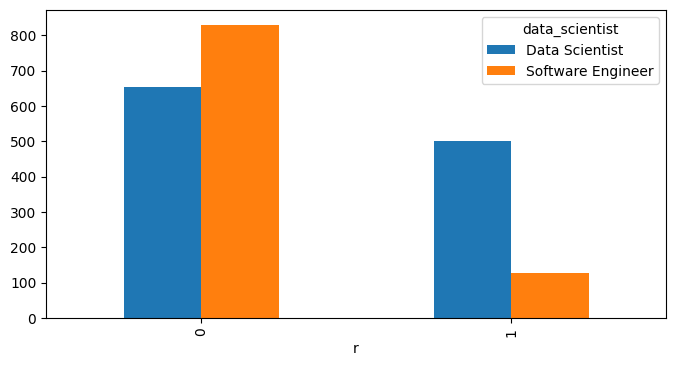

In [6]:
fig,ax = plt.subplots(figsize=(8,4))
 
X_train.assign(data_scientist= kag_y_train).groupby('r').data_scientist.value_counts().unstack().plot.bar(ax=ax)
plt.show()

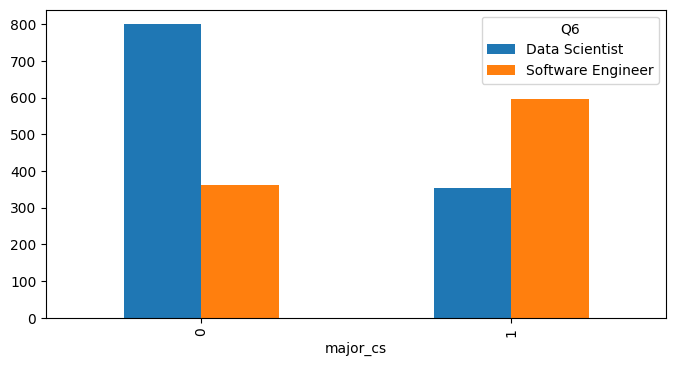

In [7]:
fig,ax = plt.subplots(figsize=(8,4))
pd.crosstab(index=X_train['major_cs'],columns=kag_y_train).plot.bar(ax=ax)
plt.show()

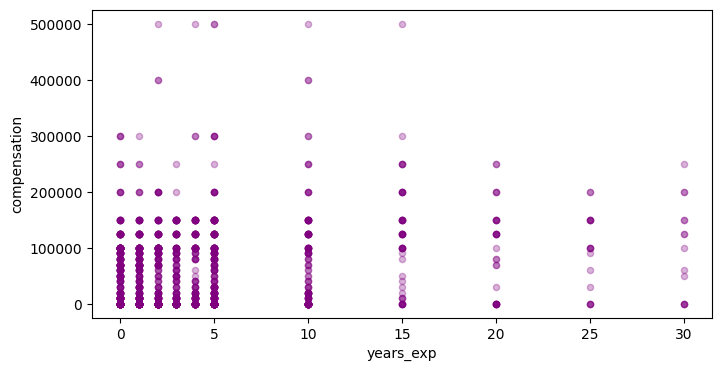

In [8]:
fig,ax = plt.subplots(figsize=(8,4))
X_train.plot.scatter(x='years_exp',y='compensation',alpha=.3,ax=ax,c='purple')
plt.show()

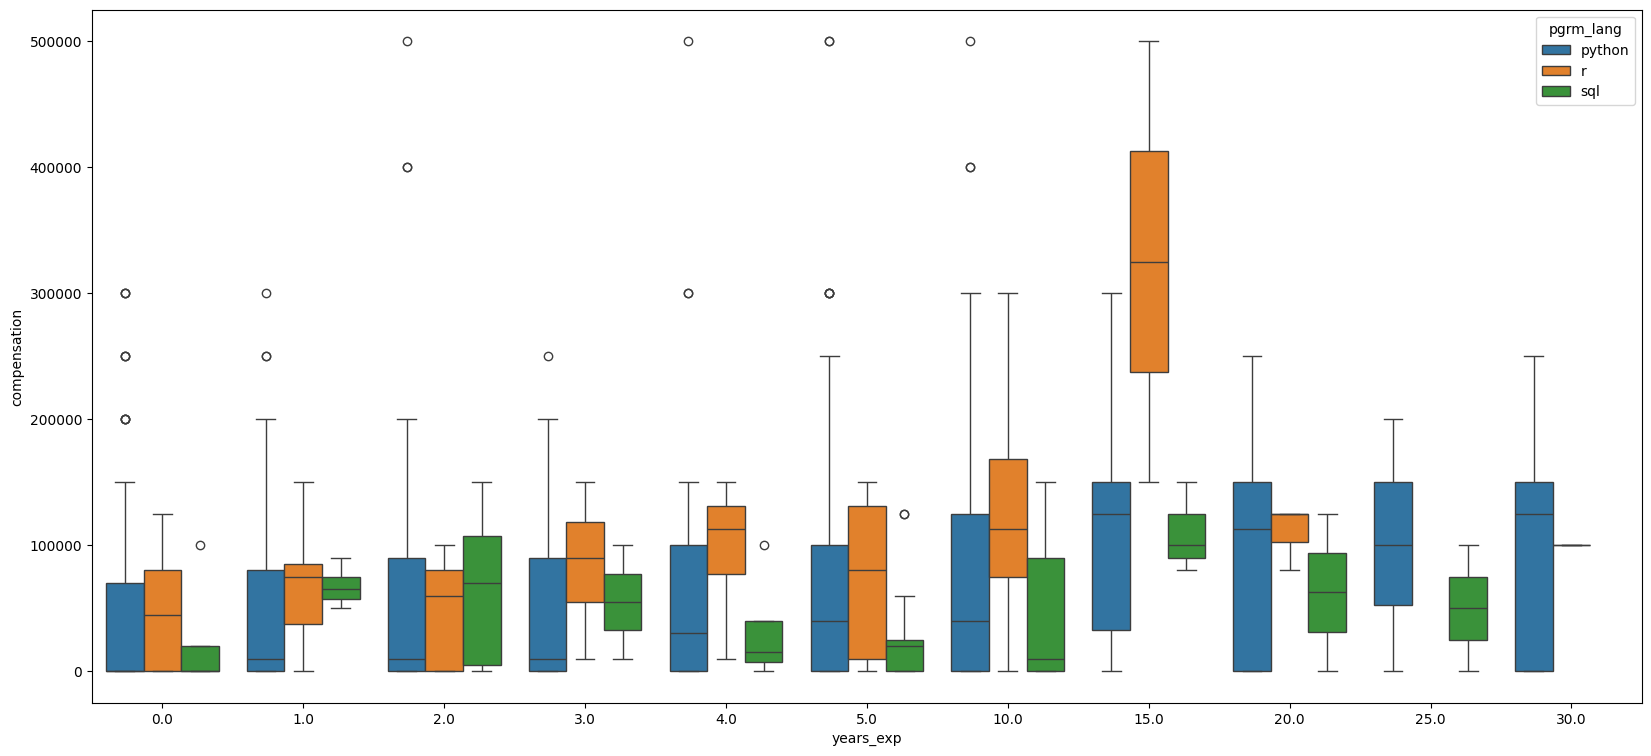

In [9]:
plt.figure(figsize=(20,9))
sns.boxplot(
    data=X_train[['age','education','years_exp','compensation','python','r','sql']].assign(pgrm_lang = X_train[['python','r','sql']].idxmax(axis=1) ).drop(['python','r','sql'],axis=1),
    x = 'years_exp',
    y='compensation',
    hue='pgrm_lang',
    orient='x',
    fill=True
)
plt.show()